# **Handwritten Digits Classification - MNIST**

In [0]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim


In [0]:
# Transforming the image to tensors and normalizing it
# x_normalized = x-mean / std
# The values 0.5 and 0.5 represent the mean and standard deviation for 3 channels: red, green, and blue.


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))
                               ])

In [4]:
# Data loading
# (Data loader: Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset.)

trainset = datasets.MNIST('', download = True, train = True, transform = transform )
valset = datasets.MNIST('', download = True, train = False, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
valloader = torch.utils.data.DataLoader(valset, batch_size = 64, shuffle = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 19463813.49it/s]                            


Extracting MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 329771.70it/s]
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5124850.59it/s]                           
8192it [00:00, 131800.53it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
# Visualisation of one image tensor and its label
dataiter = iter(trainloader)
images, labels = dataiter.next()


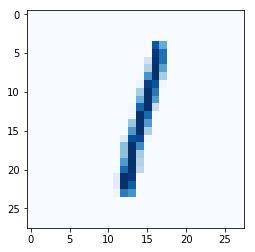

In [6]:
# Plotting one image sample from the dataset
plt.imshow(images[0].numpy().squeeze(), cmap='Blues')

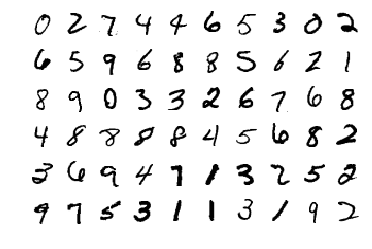

In [7]:
# Plotting multiple images from dataset

plt.figure()
for i in range(1,61):
  plt.subplot(6,10,i)
  plt.imshow(images[i].numpy().squeeze(), cmap = 'binary')
  plt.axis('off')

In [22]:
# Building the Neural Network
ip = 784
op = 10
hidden = [128,64]
model = nn.Sequential(nn.Linear(ip,hidden[0]),
                 nn.ReLU(),
                 nn.Linear(hidden[0],hidden[1]),
                 nn.ReLU(),
                 nn.Linear(hidden[1],op),
                 nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [27]:
# Defining Negative Log Likelihood Loss

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)  #Flattening the input

logps = model(images)    # Feeding input data to the model and obtaining log probs.
loss = criterion(logps,labels) #Calculating loss

tensor(2.3081, grad_fn=<NllLossBackward>)

In [31]:
# Adjusting Weights

print("Weight of model before backward pass:", model[0].weight.grad)
loss.backward()
print("Weight of model after backward pass:", model[0].weight.grad)

Weight of model before backward pass: None
Weight of model after backward pass: tensor([[-3.2827e-03, -3.2827e-03, -3.2827e-03,  ..., -3.2827e-03,
         -3.2827e-03, -3.2827e-03],
        [-3.7005e-04, -3.7005e-04, -3.7005e-04,  ..., -3.7005e-04,
         -3.7005e-04, -3.7005e-04],
        [-3.2224e-05, -3.2224e-05, -3.2224e-05,  ..., -3.2224e-05,
         -3.2224e-05, -3.2224e-05],
        ...,
        [-1.8870e-06, -1.8870e-06, -1.8870e-06,  ..., -1.8870e-06,
         -1.8870e-06, -1.8870e-06],
        [ 4.9896e-04,  4.9896e-04,  4.9896e-04,  ...,  4.9896e-04,
          4.9896e-04,  4.9896e-04],
        [ 6.7099e-04,  6.7099e-04,  6.7099e-04,  ...,  6.7099e-04,
          6.7099e-04,  6.7099e-04]])


In [35]:
# Core Training Process

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum = 0.9)
epochs = 15
time0 = time()
for i in range(epochs):
  running_loss=0.0
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    loglik =  model(images)
    loss = criterion(loglik,labels)
    loss.backward()
    running_loss += loss.item()  
    optimizer.step()
    
  else:
    print("Epoch - {}. Training Loss = {}".format(i,running_loss/len(trainloader)))
    
print("\nTraining Time (in minutes) =",(time()-time0)/60)
    

Epoch - 0. Training Loss = 0.0475572211695696
Epoch - 1. Training Loss = 0.04540746462847124
Epoch - 2. Training Loss = 0.041572787709581824
Epoch - 3. Training Loss = 0.03770065159479311
Epoch - 4. Training Loss = 0.03636878542602062
Epoch - 5. Training Loss = 0.0319516891276023
Epoch - 6. Training Loss = 0.030395421114112777
Epoch - 7. Training Loss = 0.02908714662895782
Epoch - 8. Training Loss = 0.026412484984694003
Epoch - 9. Training Loss = 0.024170892205891577
Epoch - 10. Training Loss = 0.022451410340125374
Epoch - 11. Training Loss = 0.021971048116048515
Epoch - 12. Training Loss = 0.018970710219446022
Epoch - 13. Training Loss = 0.017809126172651613
Epoch - 14. Training Loss = 0.016712404529391323

Training Time (in minutes) = 2.2919679005940754


torch.Size([1, 28, 28])
Predicted Digit = 7


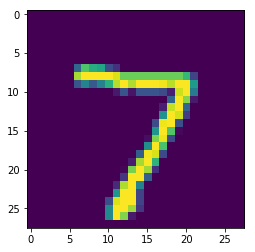

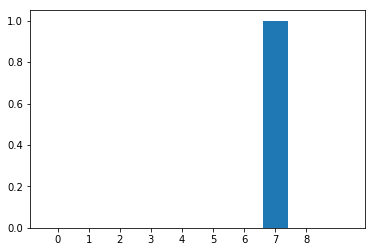

In [70]:
# Testing and evaluation

images,labels = next(iter(valset))
images,labels = next(iter(valset))
print(images.shape)
img = images.view(1,784)

lossval = model(img)

ps = torch.exp(lossval.detach())
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
plt.imshow(images[0])
fig, ax = plt.subplots()
ax.bar(names, probab, align='center')
ax.set_xticks(range(9))


In [80]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9776


In [79]:
#for i in range(len(labels)):
  print(images.shape)

torch.Size([16, 1, 28, 28])
